# Memory Pressure Notebook

# Introduction

This notebook aims to evaluate the results within a memory constrained context for the memory consumption experiment.
The goals of this notebooks are:

- Run experiments with memory constraints to validate `M_peak` accuracy.
- Ensure that measured peak memory usage reflects the actual minimum required memory.

## How to Use this Notebook

- Run the individual cells to inspect and verify the behavior of specific parts of the component.
- Review the expected behavior before running the full experiment via the shell script.
- Use this notebook as a debugging and documentation tool to support future iterations of the experiment.

By structuring the experiment this way, we ensure a clear separation between explanation, validation, and execution, making it easier to reason about the results while keeping the experiment reproducible and well-documented.

## Components Overview

Before running the component, we need to setup a few variables and utils.

In [1]:
import os
import sys
from datetime import datetime

from loguru import logger

dirs_to_add = [
    os.path.abspath('../'),
    os.path.abspath('../../../libs/traceq'),
]

for dir_to_add in dirs_to_add:
    if dir_to_add not in sys.path:
        sys.path.insert(0, dir_to_add)

TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

EXPERIMENT_IMAGE = "mac/04-memory-pressure"
RELATIVE_OUT_DIR = f"out/04-memory-pressure-{TIMESTAMP}"
CONTAINER_OUT_DIR = f"/app/{RELATIVE_OUT_DIR}"

INLINES = "700"
XLINES = "700"
SAMPLES = "400"

logger.debug("Generated global variables")
logger.debug(f"TIMESTAMP: {TIMESTAMP}")
logger.debug(f"EXPERIMENT_IMAGE: {EXPERIMENT_IMAGE}")
logger.debug(f"RELATIVE_OUT_DIR: {RELATIVE_OUT_DIR}")
logger.debug(f"CONTAINER_OUT_DIR: {CONTAINER_OUT_DIR}")

logger.debug(f"INLINES: {INLINES}")
logger.debug(f"XLINES: {XLINES}")
logger.debug(f"SAMPLES: {SAMPLES}")

os.makedirs(f"../{RELATIVE_OUT_DIR}/docker-monitor", exist_ok=True)

2025-03-03 11:21:40.379 | DEBUG    | __main__:<module>:26 - Generated global variables
2025-03-03 11:21:40.380 | DEBUG    | __main__:<module>:27 - TIMESTAMP: 20250303112140
2025-03-03 11:21:40.380 | DEBUG    | __main__:<module>:28 - EXPERIMENT_IMAGE: mac/04-memory-pressure
2025-03-03 11:21:40.380 | DEBUG    | __main__:<module>:29 - RELATIVE_OUT_DIR: out/04-memory-pressure-20250303112140
2025-03-03 11:21:40.380 | DEBUG    | __main__:<module>:30 - CONTAINER_OUT_DIR: /app/out/04-memory-pressure-20250303112140
2025-03-03 11:21:40.381 | DEBUG    | __main__:<module>:32 - INLINES: 700
2025-03-03 11:21:40.381 | DEBUG    | __main__:<module>:33 - XLINES: 700
2025-03-03 11:21:40.381 | DEBUG    | __main__:<module>:34 - SAMPLES: 400


In [124]:
import importlib
import tools.docker

importlib.reload(tools.docker)

vfs_client, vfs_container = tools.docker.get_vfs_client(f"../{RELATIVE_OUT_DIR}")

2025-03-04 01:11:51.310 | INFO     | tools.docker:get_vfs_client:63 - Start dind dockerd...
Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61055->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61060->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61069->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61074->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61087->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61094->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61099->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

ERROR: error during connect: Get "http://localhost:2375/v1.47/info": read tcp [::1]:61108->[::1]:2375: read: connection reset by peer
errors pretty printing info


Client: Docker Engine - Community
 Version:    27.3.1
 Context:    default
 Debug Mode: false
 Plugins:
  ai: Ask Gordon - Docker Agent (Docker Inc.)
    Version:  v0.7.3
    Path:     /Users/delucca/.docker/cli-plugins/docker-ai
  buildx: Docker Buildx (Docker Inc.)
    Version:  v0.20.1-desktop.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-buildx
  compose: Docker Compose (Docker Inc.)
    Version:  v2.32.4-desktop.1
    Path:     /Users/delucca/.docker/cli-plugins/docker-compose
  debug: Get a shell into any image or container (Docker Inc.)
    Version:  0.0.38
    Path:     /Users/delucca/.docker/cli-plugins/docker-debug
  desktop: Docker Desktop commands (Beta) (Docker Inc.)
    Version:  v0.1.4
    Path:     /Users/delucca/.docker/cli-plugins/docker-desktop
  dev: Docker Dev Environments (Docker Inc.)
    Version:  v0.1.2
    Path:     /Users/delucca/.docker/cli-plugins/docker-dev
  extension: Manages Docker extensions (Docker Inc.)
    Version:  v0.2.27
    Path:    

[DEPRECATION NOTICE]: API is accessible on http://0.0.0.0:2375 without encryption.
         Access to the remote API is equivalent to root access on the host. Refer
         to the 'Docker daemon attack surface' section in the documentation for
         more information: https://docs.docker.com/go/attack-surface/
In future versions this will be a hard failure preventing the daemon from starting! Learn more at: https://docs.docker.com/go/api-security/


Let's start by building the Docker image within the VFS client

In [258]:
from loguru import logger

logger.info("Building experiment image...")
experiment_image = tools.docker.build_image(EXPERIMENT_IMAGE, vfs_client)
logger.info("Experiment image built successfully.")

2025-03-04 13:04:17.018 | INFO     | __main__:<module>:3 - Building experiment image...
2025-03-04 13:04:17.019 | INFO     | tools.docker:build_image:16 - Building TraceQ image...
2025-03-04 13:04:25.599 | INFO     | tools.docker:build_image:22 - TraceQ image built.
2025-03-04 13:04:25.600 | INFO     | tools.docker:build_image:24 - Building experiment image...
2025-03-04 13:05:10.822 | INFO     | tools.docker:build_image:32 - Experiment image built.
2025-03-04 13:05:10.823 | INFO     | __main__:<module>:5 - Experiment image built successfully.


With the image built, we're going to generate the test data.

In [129]:
memory_usage_log_file = f"docker-monitor/memory-usage--data-generation.log"
page_faults_log_file = f"docker-monitor/page-faults--data-generation.log"

logger.info("Generating test data...")
data_generator_container = vfs_client.containers.run(
    image=EXPERIMENT_IMAGE,
    auto_remove=True,
    privileged=True,
    command=[
        "generate-data",
        "--inlines", INLINES,
        "--xlines", XLINES,
        "--samples", SAMPLES,
        "--output-dir", f"{CONTAINER_OUT_DIR}/data"
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py generate-data",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished generating test data")

2025-03-04 01:18:49.298 | INFO     | __main__:<module>:6 - Generating test data...
2025-03-04 01:18:54.016 | INFO     | __main__:<module>:33 - Finished generating test data


We'll start by running the operator without memory constraints to check the memory usage.

In [266]:
memory_usage_log_file = f"docker-monitor/memory-usage--0-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--0-pct-pressure.log"

logger.info("Launching experiment...")
experiment_container = vfs_client.containers.run(
    image=EXPERIMENT_IMAGE,
    auto_remove=True,
    privileged=True,
    nano_cpus=int(1 * 1e9),  # Strictly allocate 1 CPU (1 * 1,000,000,000 nanoCPUs)
    cpu_shares=1024,  # Relative CPU priority
    cpuset_cpus="0",  # Pin to CPUs 0 for strict consistency
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-0-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-04 13:19:33.169 | INFO     | tools.docker:build_image:16 - Building TraceQ image...
2025-03-04 13:19:41.265 | INFO     | tools.docker:build_image:22 - TraceQ image built.
2025-03-04 13:19:41.266 | INFO     | tools.docker:build_image:24 - Building experiment image...
2025-03-04 13:20:05.673 | INFO     | tools.docker:build_image:32 - Experiment image built.
2025-03-04 13:20:05.673 | INFO     | __main__:<module>:6 - Launching experiment...
2025-03-04 13:20:16.776 | INFO     | __main__:<module>:35 - Finished executing experiment


In [208]:
from traceq import load_profile
import tools.conversions

importlib.reload(tools.conversions)

psutil_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-0-pct-pressure.prof")
psutil_peak_memory_usage = tools.conversions.b_to_mb(
    max(entry["psutil_memory_usage"] for entry in psutil_profile["data"]))

logger.info(f"Tracer captured {len(psutil_profile["data"])} traces")
logger.info(f"Peak memory usage from psutil profile: {psutil_peak_memory_usage} MB")

2025-03-04 04:28:45.413 | INFO     | __main__:<module>:10 - Tracer captured 287 traces
2025-03-04 04:28:45.414 | INFO     | __main__:<module>:11 - Peak memory usage from psutil profile: 5317.38671875 MB


Now, we're going to run the operator with memory constraints to check the memory usage.
The idea is to execute with less memory than the peak memory usage to check if the operator breaks.

In [267]:
memory_usage_log_file = f"docker-monitor/memory-usage--1-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--1-pct-pressure.log"

psutil_peak_memory_usage_99_pct = int(float(psutil_peak_memory_usage) * 0.99)
logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(psutil_peak_memory_usage_99_pct)} GB")

logger.info("Launching experiment...")
vfs_client.containers.run(
    image=EXPERIMENT_IMAGE,
    auto_remove=True,
    privileged=True,
    nano_cpus=int(1 * 1e9),  # Strictly allocate 1 CPU (1 * 1,000,000,000 nanoCPUs)
    cpu_shares=1024,  # Relative CPU priority
    cpuset_cpus="0",  # Pin to CPUs 0 for strict consistency
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-1-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
        "MEMORY_LIMIT_MB": psutil_peak_memory_usage_99_pct,
        "MEMORY_PRESSURE_LOG_FILE": f"{CONTAINER_OUT_DIR}/docker-monitor/memory-pressure.log",
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-04 13:20:58.144 | INFO     | __main__:<module>:5 - Memory limit will be 5.140625 GB
2025-03-04 13:20:58.144 | INFO     | __main__:<module>:7 - Launching experiment...
2025-03-04 13:21:11.640 | INFO     | __main__:<module>:37 - Finished executing experiment


In [220]:
import tools.monitor

importlib.reload(tools.monitor)
importlib.reload(tools.conversions)

docker_monitor_1_pct_pressure_mu_df = tools.monitor.memory_usage_log_to_df(
    f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-usage--1-pct-pressure.log",
)

psutil_1_pct_pressure_profile = load_profile(
    f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-1-pct-pressure.prof")
psutil_1_pct_pressure_peak_memory_usage = tools.conversions.b_to_gb(
    max(entry["psutil_memory_usage"] for entry in psutil_1_pct_pressure_profile["data"]))

docker_monitor_1_pct_pressure_peak_memory_usage = tools.conversions.kb_to_gb(
    docker_monitor_1_pct_pressure_mu_df["memory_usage_kb"].max()
)

logger.info(f"Tracer captured {len(psutil_1_pct_pressure_profile["data"])} traces")
logger.info(f"Docker monitor captured {len(docker_monitor_1_pct_pressure_mu_df)} traces")
logger.info(f"Peak memory usage from psutil profile: {psutil_1_pct_pressure_peak_memory_usage} GB")
logger.info("Peak memory usage from Docker monitor: {} GB".format(docker_monitor_1_pct_pressure_peak_memory_usage))
logger.info(f"Docker limit memory usage: {tools.conversions.mb_to_gb(psutil_peak_memory_usage_99_pct)} GB")

2025-03-04 04:37:56.663 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--1-pct-pressure.log
2025-03-04 04:37:56.666 | INFO     | __main__:<module>:19 - Tracer captured 312 traces
2025-03-04 04:37:56.666 | INFO     | __main__:<module>:20 - Docker monitor captured 497 traces
2025-03-04 04:37:56.666 | INFO     | __main__:<module>:21 - Peak memory usage from psutil profile: 5.087150573730469 GB
2025-03-04 04:37:56.667 | INFO     | __main__:<module>:22 - Peak memory usage from Docker monitor: 5.140594482421875 GB
2025-03-04 04:37:56.667 | INFO     | __main__:<module>:23 - Docker limit memory usage: 5.140625 GB


As we can see, even with a 1% memory constraint, the operator was able to execute successfully.
For some reason, the profiler reports a memory usage higher than the limit set by Docker.
Let's try with a stricter constraint.

In [268]:
memory_usage_log_file = f"docker-monitor/memory-usage--5-pct-pressure.log"
page_faults_log_file = f"docker-monitor/page-faults--5-pct-pressure.log"

psutil_peak_memory_usage_95_pct = int(float(psutil_peak_memory_usage) * 0.95)
logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(psutil_peak_memory_usage_95_pct)} GB")

logger.info("Launching experiment...")
vfs_client.containers.run(
    image=EXPERIMENT_IMAGE,
    auto_remove=True,
    privileged=True,
    nano_cpus=int(1 * 1e9),  # Strictly allocate 1 CPU (1 * 1,000,000,000 nanoCPUs)
    cpu_shares=1024,  # Relative CPU priority
    cpuset_cpus="0",  # Pin to CPUs 0 for strict consistency
    command=[
        "operate",
        "envelope",
        "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
        "--memory-profiler", "psutil",
        "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
        "--memory-profile-session-id", f"{INLINES}-{XLINES}-{SAMPLES}-5-pct-pressure",
    ],
    environment={
        "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
        "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
        "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
        "MEMORY_LIMIT_MB": psutil_peak_memory_usage_95_pct,
    },
    volumes={
        "/mnt/out": {
            "bind": CONTAINER_OUT_DIR,
            "mode": "rw",
        }
    },
)
logger.info("Finished executing experiment")

2025-03-04 13:23:05.760 | INFO     | __main__:<module>:5 - Memory limit will be 4.9326171875 GB
2025-03-04 13:23:05.761 | INFO     | __main__:<module>:7 - Launching experiment...
2025-03-04 13:23:19.705 | INFO     | __main__:<module>:37 - Finished executing experiment


As we can see, even with 5% memory pressure the experiment still runs.
In this case we can see that the profiler reports a memory usage close to the limit set by Docker, which is expected.
Now, let's try increasing the pressure until it breaks.

In [256]:
# Remove the log files of the pressure experiment so far
profiler_dir_path = f"../{RELATIVE_OUT_DIR}/profiler"
docker_monitor_dir_path = f"../{RELATIVE_OUT_DIR}/docker-monitor"

profile_files = os.listdir(profiler_dir_path)
docker_monitor_files = os.listdir(docker_monitor_dir_path)

for file in profile_files:
    if "pct-pressure" in file:
        os.remove(f"{profiler_dir_path}/{file}")

for file in docker_monitor_files:
    if "pct-pressure" in file:
        os.remove(f"{docker_monitor_dir_path}/{file}")


In [269]:
def list_profiles(prefix: str):
    profiler_dir_path = f"../{RELATIVE_OUT_DIR}/profiler"
    profile_files = os.listdir(profiler_dir_path)
    return [file for file in profile_files if prefix in file]


def get_avg_memory_usage(prefix: str):
    profiles = list_profiles(prefix)
    peak_memory_usages = []

    for profile in profiles:
        psutil_profile = load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{profile}")
        peak_memory_usages.append(
            tools.conversions.b_to_gb(
                max(entry["psutil_memory_usage"] for entry in psutil_profile["data"])
            )
        )

    return sum(peak_memory_usages) / len(peak_memory_usages)


def experiment(pressure_pct: int, peak_memory_usage: str = psutil_peak_memory_usage, iterations: int = 5):
    logger.info(f"Running experiment with {pressure_pct}% pressure")

    logger.info(
        f"Recorded peak memory usage without memory pressure was: {tools.conversions.mb_to_gb(peak_memory_usage)} GB")

    profile_prefix = f"{INLINES}-{XLINES}-{SAMPLES}-{pressure_pct}-pct-pressure"

    for i in range(iterations):
        logger.info(f"Running iteration {i + 1}...")

        memory_usage_log_file = f"docker-monitor/memory-usage--{pressure_pct}-pct-pressure-{i}.log"
        page_faults_log_file = f"docker-monitor/page-faults--{pressure_pct}-pct-pressure-{i}.log"
        memory_pressure_log_file = f"docker-monitor/memory-pressure--{pressure_pct}-pct-pressure-{i}.log"

        mem_limit = int(float(peak_memory_usage) * ((100 - pressure_pct) / 100))

        logger.info(f"Memory limit will be {tools.conversions.mb_to_gb(mem_limit)} GB")

        logger.info("Launching experiment...")
        experiment_container = vfs_client.containers.run(
            image=EXPERIMENT_IMAGE,
            detach=True,
            auto_remove=True,
            privileged=True,
            nano_cpus=int(1 * 1e9),  # Strictly allocate 1 CPU (1 * 1,000,000,000 nanoCPUs)
            cpu_shares=1024,  # Relative CPU priority
            cpuset_cpus="0",  # Pin to CPUs 0 for strict consistency
            command=[
                "operate",
                "envelope",
                "--segy-path", f"{CONTAINER_OUT_DIR}/data/{INLINES}-{XLINES}-{SAMPLES}.segy",
                "--memory-profiler", "psutil",
                "--memory-profile-output-dir", f"{CONTAINER_OUT_DIR}/profiler",
                "--memory-profile-session-id", f"{profile_prefix}-{i}",
            ],
            environment={
                "MEMORY_USAGE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_usage_log_file}",
                "PAGE_FAULTS_LOG_FILE": f"{CONTAINER_OUT_DIR}/{page_faults_log_file}",
                "MEMORY_PRESSURE_LOG_FILE": f"{CONTAINER_OUT_DIR}/{memory_pressure_log_file}",
                "PAGE_FAULTS_MONITORED_PROCESS_NAME": "main.py operate",
                "MEMORY_LIMIT_MB": mem_limit,
            },
            volumes={
                "/mnt/out": {
                    "bind": CONTAINER_OUT_DIR,
                    "mode": "rw",
                }
            },
        )
        status_code = experiment_container.wait()["StatusCode"]
        logger.info(f"Container exited with code: {status_code}")
        logger.info("Finished executing experiment")

        docker_monitor_mu_df = tools.monitor.memory_usage_log_to_df(
            f"../{RELATIVE_OUT_DIR}/{memory_usage_log_file}",
        )

        psutil_profile = load_profile(
            f"../{RELATIVE_OUT_DIR}/profiler/{profile_prefix}-{i}.prof")
        psutil_peak_memory_usage = tools.conversions.b_to_gb(
            max(entry["psutil_memory_usage"] for entry in psutil_profile["data"]))

        docker_monitor_peak_memory_usage = tools.conversions.kb_to_gb(
            docker_monitor_mu_df["memory_usage_kb"].max()
        )

        logger.info(f"Tracer captured {len(psutil_profile["data"])} traces")
        logger.info(f"Docker monitor captured {len(docker_monitor_mu_df)} traces")
        logger.info(f"Peak memory usage from psutil profile: {psutil_peak_memory_usage} GB")
        logger.info("Peak memory usage from Docker monitor: {} GB".format(docker_monitor_peak_memory_usage))
        logger.info(f"Docker limit memory usage: {tools.conversions.mb_to_gb(mem_limit)} GB")

        yield status_code

    avg_memory_usage = get_avg_memory_usage(profile_prefix)
    logger.info(f"Average memory usage for {pressure_pct}% pressure: {avg_memory_usage} GB")

In [ ]:
pressure_pct = 0
pressure_step = 1

while True:
    try:
        for status_code in experiment(pressure_pct=pressure_pct):
            logger.info(f"Experiment exited with code: {status_code}")
            if status_code != 0:
                logger.error(f"Experiment failed with {pressure_pct}% pressure")
                break
    except Exception as e:
        logger.error(f"Experiment threw an exception with {pressure_pct}% pressure")
        logger.error(e)
        break

    pressure_pct += pressure_step

2025-03-04 13:31:57.030 | INFO     | __main__:experiment:23 - Running experiment with 0% pressure
2025-03-04 13:31:57.031 | INFO     | __main__:experiment:25 - Recorded peak memory usage without memory pressure was: 5.192760467529297 GB
2025-03-04 13:31:57.031 | INFO     | __main__:experiment:31 - Running iteration 1...
2025-03-04 13:31:57.031 | INFO     | __main__:experiment:39 - Memory limit will be 5.1923828125 GB
2025-03-04 13:31:57.032 | INFO     | __main__:experiment:41 - Launching experiment...
2025-03-04 13:32:10.339 | INFO     | __main__:experiment:73 - Container exited with code: 0
2025-03-04 13:32:10.339 | INFO     | __main__:experiment:74 - Finished executing experiment
2025-03-04 13:32:10.339 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--0-pct-pressure-0.log
2025-03-04 13:32:10.341 | INFO     | __main__:experiment:89 - Tracer captured 508 traces
2025-03-04 13:32:10

As we can see, the experiment was able to run even with a large amount of memory pressure.
It only breaks after 90% pressure.
Let's now evaluate the results.

In [248]:
# Removes the log files for the pressure that failed
docker_monitor_dir_path = f"../{RELATIVE_OUT_DIR}/docker-monitor"
docker_monitor_files = os.listdir(docker_monitor_dir_path)

for file in profile_files:
    if f"{pressure_pct}-pct-pressure" in file:
        os.remove(f"{profiler_dir_path}/{file}")

FileNotFoundError: [Errno 2] No such file or directory: '../out/04-memory-pressure-20250303112140/profiler/700-700-400-0-pct-pressure.prof'

In [237]:
importlib.reload(tools.monitor)

filtered_profile_files = list_profiles("pressure")
captured_profile_names = [(file.split("-")[3], file.split("-")[6]) for file in filtered_profile_files]
sorted_captured_profile_names = sorted(captured_profile_names, key=lambda x: (int(x[0]), int(x[1])))

docker_monitor_mu_dfs = [
    tools.monitor.memory_usage_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-usage--{pressure}-pct-pressure.log",
    ) for pressure in sorted_captured_profile_names
]

docker_monitor_pf_dfs = [
    tools.monitor.page_faults_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/page-faults--{pressure}-pct-pressure.log",
    ) for pressure in sorted_captured_profile_names
]

docker_monitor_pressure_dfs = [
    tools.monitor.memory_pressure_log_to_df(
        f"../{RELATIVE_OUT_DIR}/docker-monitor/memory-pressure--{pressure}-pct-pressure.log",
    ) for pressure in sorted_captured_profile_names
]

memory_usage_profiles = [
    load_profile(f"../{RELATIVE_OUT_DIR}/profiler/{INLINES}-{XLINES}-{SAMPLES}-{pressure}-pct-pressure.prof")
    for pressure in sorted_captured_profile_names
]

profiles = list(
    zip(
        sorted_captured_profile_names,
        docker_monitor_mu_dfs,
        docker_monitor_pf_dfs,
        docker_monitor_pressure_dfs,
        memory_usage_profiles,
    ),
)

2025-03-04 04:45:55.226 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--0-pct-pressure.log
2025-03-04 04:45:55.227 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--3-pct-pressure.log
2025-03-04 04:45:55.228 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--6-pct-pressure.log
2025-03-04 04:45:55.229 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--9-pct-pressure.log
2025-03-04 04:45:55.230 | INFO     | tools.monitor:memory_usage_log_to_df:8 - Reading memory usage log) file: ../out/04-memory-pressure-20250303112140/docker-monitor/memory-usage--12-pct-pressure.log
2025

In [227]:
profiles[0][0]

'0'

In [228]:
profiles[0][1]

,timestamp,memory_usage_kb
0,2025-03-04 07:39:45.297,28752
1,2025-03-04 07:39:45.311,27140
2,2025-03-04 07:39:45.324,33144
3,2025-03-04 07:39:45.336,33264
4,2025-03-04 07:39:45.349,33964
...,...,...
517,2025-03-04 07:39:52.070,105448
518,2025-03-04 07:39:52.082,105200
519,2025-03-04 07:39:52.096,20428
520,2025-03-04 07:39:52.108,11916


In [229]:
profiles[0][2]

,timestamp,minor_page_faults,major_page_faults
0,2025-03-04 07:39:45.306,424,0
1,2025-03-04 07:39:45.318,1610,0
2,2025-03-04 07:39:45.335,2535,0
3,2025-03-04 07:39:45.349,2595,0
4,2025-03-04 07:39:45.361,2595,0
...,...,...,...
475,2025-03-04 07:39:52.032,231556,12917
476,2025-03-04 07:39:52.044,231706,12940
477,2025-03-04 07:39:52.058,232339,13025
478,2025-03-04 07:39:52.071,232824,13130


In [230]:
profiles[0][3]

{'metadata': {'entrypoint_data': '[[[-1.136836   -1.136836   -1.136836   ... -1.136836   -1.136836\n   -1.136836  ]\n  [-1.8006277  -1.8006277  -1.8006277  ... -1.8006277  -1.8006277\n   -1.8006277 ]\n  [-1.5840807  -1.5840807  -1.5840807  ... -1.5840807  -1.5840807\n   -1.5840807 ]\n  ...\n  [ 0.80153054  0.80153054  0.80153054 ...  0.80153054  0.80153054\n    0.80153054]\n  [ 0.54930043  0.54930043  0.54930043 ...  0.54930043  0.54930043\n    0.54930043]\n  [ 0.09139037  0.09139037  0.09139037 ...  0.09139037  0.09139037\n    0.09139037]]\n\n [[-1.136836   -1.136836   -1.136836   ... -1.136836   -1.136836\n   -1.136836  ]\n  [-1.8006277  -1.8006277  -1.8006277  ... -1.8006277  -1.8006277\n   -1.8006277 ]\n  [-1.5840807  -1.5840807  -1.5840807  ... -1.5840807  -1.5840807\n   -1.5840807 ]\n  ...\n  [ 0.80153054  0.80153054  0.80153054 ...  0.80153054  0.80153054\n    0.80153054]\n  [ 0.54930043  0.54930043  0.54930043 ...  0.54930043  0.54930043\n    0.54930043]\n  [ 0.09139037  0.0913

In [ ]:
profiles[0][4]

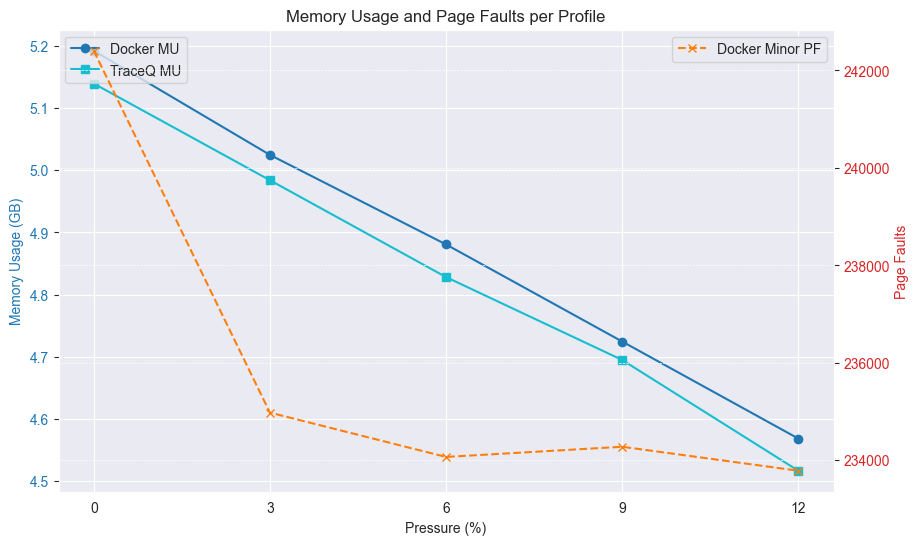

In [240]:
import matplotlib.pyplot as plt

peak_docker_mus = []
peak_traceq_mus = []
peak_docker_minor_pfs = []
labels = []

for pct_pressure, docker_mu_df, docker_pf_df, traceq_profile in profiles:
    peak_docker_mu = tools.conversions.kb_to_gb(docker_mu_df["memory_usage_kb"].max())
peak_docker_minor_pf = docker_pf_df["minor_page_faults"].max()
peak_traceq_mu = tools.conversions.b_to_gb(
    max(entry["psutil_memory_usage"] for entry in traceq_profile["data"])
)

peak_docker_mus.append(peak_docker_mu)
peak_traceq_mus.append(peak_traceq_mu)
peak_docker_major_pfs.append(peak_docker_major_pf)
peak_docker_minor_pfs.append(peak_docker_minor_pf)
labels.append(pct_pressure)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Memory Usage (MU) on the left y-axis
ax1.set_xlabel("Pressure (%)")
ax1.set_ylabel("Memory Usage (GB)", color="tab:blue")
ax1.plot(labels, peak_docker_mus, "o-", color="tab:blue", label="Docker MU")
ax1.plot(labels, peak_traceq_mus, "s-", color="tab:cyan", label="TraceQ MU")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a secondary y-axis for Page Faults (PF)
ax2 = ax1.twinx()
ax2.set_ylabel("Minor Page Faults", color="tab:red")
ax2.plot(labels, peak_docker_minor_pfs, "x--", color="tab:orange", label="Docker Minor Page Faults")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Title and layout
plt.title("Memory Usage and Minor Page Faults per Profile")
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

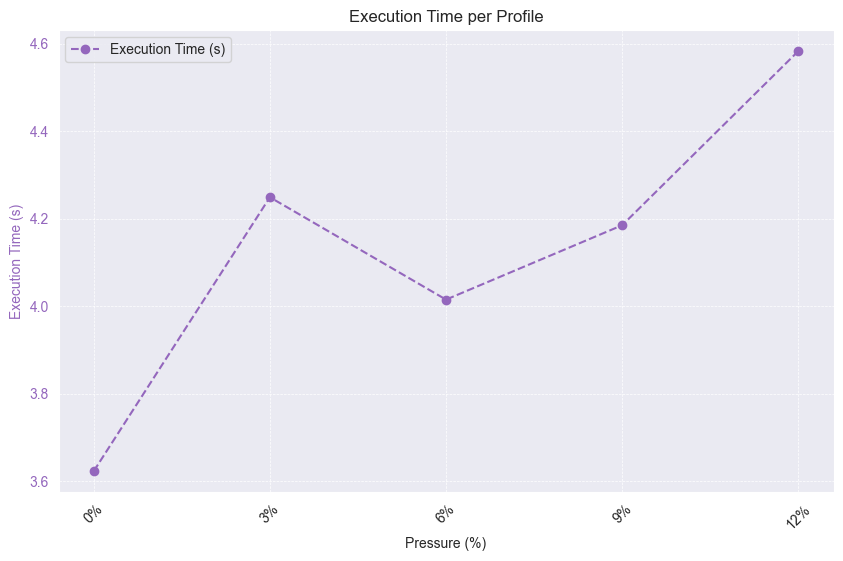

In [238]:
execution_times = []
labels = []

# Extract execution time from profiles
for pct_pressure, _, _, traceq_profile in profiles:
    timestamps = [entry["unix_timestamp"] for entry in traceq_profile["data"]]
execution_time = (max(timestamps) - min(timestamps)) / 1000  # Compute execution time in seconds
execution_times.append(execution_time)
labels.append(f"{pct_pressure}%")

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot execution time
ax.plot(labels, execution_times, "o--", color="tab:purple", label="Execution Time (s)")
ax.set_xlabel("Pressure (%)")
ax.set_ylabel("Execution Time (s)", color="tab:purple")
ax.tick_params(axis="y", labelcolor="tab:purple")
ax.set_title("Execution Time per Profile")
ax.legend()
ax.grid(True, linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Summary of Findings

TODO